In [1]:
import pandas as pd
import selenium
import folium
import time
import googlemaps
import numpy as np
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from tqdm import tqdm_notebook
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait as wait

In [85]:
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)
time.sleep(2)
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\1603894438.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


In [86]:
driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]').send_keys("서울")

In [87]:
gu_list_raw = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')

In [88]:
gu_list = gu_list_raw.find_elements(By.XPATH, '//*[@id="SIGUNGU_NM0"]/option')

In [89]:
gu_list[1].text

'강남구'

In [7]:
gu_name = []
for value in gu_list[1:]:
    gu_name.append(value.text)

In [8]:
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [9]:
driver.find_element(By.XPATH, '//*[@id="SELF_DIV_CD"]').click()
driver.find_element(By.XPATH, '//*[@id="VLT_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="KPETRO_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="KPETRO_DP_YN"]').click()

In [10]:
driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]').send_keys(gu_name[0])

In [90]:
# soup.select_one("#totCnt").get_text()

In [12]:
driver.find_element(By.XPATH, '//*[@id="body1"]/tr[1]/td[1]/a').click()
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [13]:
soup.select_one("#os_nm").get_text()

'현대오일뱅크(주) 유진주유소'

In [14]:
soup.select_one("#rd_addr").get_text()

'서울 강남구 논현로 152 (도곡동)'

In [15]:
soup.select("ul > li > label")[23].get_text()

'현대오일뱅크'

In [16]:
soup.select("td > label")[2].get_text() # 휘발유 

'1,624'

In [17]:
soup.select("td > label")[4].get_text() # 경유

'1,679'

In [18]:
str(soup.select_one("#cwsh_yn")).find("off") # 세차장

-1

In [19]:
str(soup.select_one("#lpg_yn")).find("off") # 충전소

76

In [20]:
str(soup.select_one("#maint_yn")).find("off") # 경정비

-1

In [21]:
str(soup.select_one("#cvs_yn")).find("off") # 편의점

73

In [22]:
str(soup.select_one("#sel24_yn")).find("off") # 24시

77

In [23]:
normal_name =[]
normal_address =[]
normal_brand =[]
normal_oil =[]
normal_fuel =[]
normal_self =[]
normal_wash =[]
normal_ele =[]
normal_engi =[]
normal_store =[]
normal_24 =[]
normal_gu =[]

In [91]:
driver.close() 

In [92]:
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)
time.sleep(2)
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\1603894438.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


In [93]:
driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]').send_keys("서울")

In [94]:
driver.find_element(By.XPATH, '//*[@id="SELF_DIV_CD"]').click()
driver.find_element(By.XPATH, '//*[@id="VLT_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="KPETRO_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="KPETRO_DP_YN"]').click()

In [29]:
for gu in tqdm_notebook(gu_name):
    driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]').send_keys(gu)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    time.sleep(1)

    
    for num in range(1, int(soup.select_one("#totCnt").get_text())+1):
        time.sleep(1)
        driver.find_element(By.XPATH, f'//*[@id="body1"]/tr[{num}]/td[1]/a').click()
        req = driver.page_source
        soup = BeautifulSoup(req, "html.parser")
        time.sleep(1)
        normal_name.append(soup.select_one("#os_nm").get_text())
        normal_address.append(soup.select_one("#rd_addr").get_text())
        normal_brand.append(soup.select("ul > li > label")[23].get_text())
        normal_oil.append(soup.select("td > label")[2].get_text())
        normal_fuel.append(soup.select("td > label")[4].get_text())
        normal_self.append("N")
        time.sleep(1)
        if str(soup.select_one("#cwsh_yn")).find("off") > 1:
                           normal_wash.append("N")
        else:
                          normal_wash.append("Y")
                           
        if str(soup.select_one("#lpg_yn")).find("off") > 1:
                           normal_ele.append("N")
        else:
                          normal_ele.append("Y")
                        
        if str(soup.select_one("#maint_yn")).find("off") > 1:
                           normal_engi.append("N")
        else:
                          normal_engi.append("Y")
                    
        if str(soup.select_one("#cvs_yn")).find("off") > 1:
                           normal_store.append("N")
        else:
                          normal_store.append("Y")
                           
        if str(soup.select_one("#sel24_yn")).find("off") > 1:
                           normal_24.append("N")
        else:
                          normal_24.append("Y")
         
        normal_gu.append(gu)

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\1065052071.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_name):


  0%|          | 0/25 [00:00<?, ?it/s]

In [30]:
len(normal_name), len(normal_address),len(normal_brand), len(normal_oil),len(normal_fuel),len(normal_self),len(normal_wash), len(normal_ele),len(normal_engi),len(normal_store),len(normal_24),len(normal_gu)

(188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188)

In [31]:
df_normal = pd.DataFrame({
    "name" : normal_name,
    "address" : normal_address,
    "brand" : normal_brand,
    "oil" : normal_oil,
    "fuel" : normal_fuel,
    "self" : normal_self,
    "wash" : normal_wash,
    "ele" : normal_ele,
    "engi" : normal_engi,
    "store" : normal_store,
    "24 hour" : normal_24,
    "gu" : normal_gu})

In [32]:
df_normal

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu
0,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,"1,624","1,679",N,Y,N,Y,N,N,강남구
1,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),S-OIL,"1,669","1,734",N,Y,N,Y,N,N,강남구
2,SK에너지㈜ 진달래주유소,서울 강남구 도곡로 208,SK에너지,"1,679","1,709",N,Y,N,N,N,N,강남구
3,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,"1,749","1,849",N,Y,N,N,N,Y,강남구
4,에스제이에너지산업(주) 개포주유소,서울 강남구 양재대로 339,GS칼텍스,"1,848","1,778",N,Y,N,N,N,N,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
183,약수주유소,서울 중구 다산로 173,GS칼텍스,"2,197","2,168",N,Y,N,Y,N,Y,중구
184,필동주유소,서울 중구 퇴계로 196 (필동2가),GS칼텍스,"2,479","2,369",N,N,N,N,N,Y,중구
185,서남주유소,서울 중구 통일로 30,SK에너지,"2,663","2,507",N,Y,N,N,N,Y,중구
186,범아주유소,서울 중랑구 동일로 881 (묵동),S-OIL,"1,599","1,609",N,Y,N,Y,N,N,중랑구


In [95]:
driver.close()

In [34]:
self_name =[]
self_address =[]
self_brand =[]
self_oil =[]
self_fuel =[]
self_self =[]
self_wash =[]
self_ele =[]
self_engi =[]
self_store =[]
self_24 =[]
self_gu =[]

In [96]:
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)
time.sleep(2)
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\1603894438.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


In [97]:
driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]').send_keys("서울")

In [98]:
driver.find_element(By.XPATH, '//*[@id="NORM_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="VLT_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="KPETRO_YN"]').click()
driver.find_element(By.XPATH, '//*[@id="KPETRO_DP_YN"]').click()

In [38]:
for gu in tqdm_notebook(gu_name):
    driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]').send_keys(gu)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    time.sleep(1)

    
    for num in range(1, int(soup.select_one("#totCnt").get_text())+1):
        print(num)
        driver.find_element(By.XPATH, f'//*[@id="body1"]/tr[{num}]/td[1]/a').click()
        req = driver.page_source
        soup = BeautifulSoup(req, "html.parser")
        time.sleep(1)
        self_name.append(soup.select_one("#os_nm").get_text())
        self_address.append(soup.select_one("#rd_addr").get_text())
        self_brand.append(soup.select("ul > li > label")[23].get_text())
        self_oil.append(soup.select("td > label")[2].get_text())
        self_fuel.append(soup.select("td > label")[4].get_text())
        self_self.append("Y")
        time.sleep(1)
        if str(soup.select_one("#cwsh_yn")).find("off") > 1:
                           self_wash.append("N")
        else:
                           self_wash.append("Y")
                           
        if str(soup.select_one("#lpg_yn")).find("off") > 1:
                           self_ele.append("N")
        else:
                           self_ele.append("Y")
                        
        if str(soup.select_one("#maint_yn")).find("off") > 1:
                           self_engi.append("N")
        else:
                           self_engi.append("Y")
                    
        if str(soup.select_one("#cvs_yn")).find("off") > 1:
                           self_store.append("N")
        else:
                           self_store.append("Y")
                           
        if str(soup.select_one("#sel24_yn")).find("off") > 1:
                           self_24.append("N")
        else:
                           self_24.append("Y")
         
        self_gu.append(gu)

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\599714284.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_name):


  0%|          | 0/25 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
1
2
3
4
5
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
2
3
4
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
1
2
1
2
3
4
5
6
7
8
9
10
11


In [39]:
len(self_name), len(self_address),len(self_brand), len(self_oil),len(self_fuel),len(self_self),len(self_wash), len(self_ele),len(self_engi),len(self_store),len(self_24),len(self_gu)

(254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254)

In [44]:
df_self = pd.DataFrame({
    "name" : self_name,
    "address" : self_address,
    "brand" : self_brand,
    "oil" : self_oil,
    "fuel" : self_fuel,
    "self" : self_self,
    "wash" : self_wash,
    "ele" : self_ele,
    "engi" : self_engi,
    "store" : self_store,
    "24 hour" : self_24,
    "gu" : self_gu})

In [41]:
driver.close()

In [43]:
df_self.head()

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,"1,543","1,594",Y,Y,N,N,N,N,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,"1,599","1,619",Y,Y,N,N,N,N,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,"1,609","1,664",Y,Y,N,Y,N,N,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"1,624","1,679",Y,Y,N,Y,N,Y,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,"1,627","1,669",Y,Y,N,N,N,N,강남구


In [530]:
df_normal.head()

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu
0,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,"1,624","1,679",N,Y,N,Y,N,N,강남구
1,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),S-OIL,"1,669","1,734",N,Y,N,Y,N,N,강남구
2,SK에너지㈜ 진달래주유소,서울 강남구 도곡로 208,SK에너지,"1,679","1,709",N,Y,N,N,N,N,강남구
3,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,"1,749","1,849",N,Y,N,N,N,Y,강남구
4,에스제이에너지산업(주) 개포주유소,서울 강남구 양재대로 339,GS칼텍스,"1,848","1,778",N,Y,N,N,N,N,강남구


In [45]:
gmaps_key = ""
gmaps =googlemaps.Client(key=gmaps_key)

In [46]:
df_self["address"][0]

'서울 강남구  헌릉로 731 (세곡동)'

In [47]:
geo_data = gmaps.geocode(df_self["address"][0])

In [48]:
geo_location = geo_data[0].get("geometry")
geo_location

{'location': {'lat': 37.4672103, 'lng': 127.1187128},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 37.46855928029149,
   'lng': 127.1200617802915},
  'southwest': {'lat': 37.46586131970849, 'lng': 127.1173638197085}}}

In [49]:
geo_location["location"]["lat"], geo_location["location"]["lng"]

(37.4672103, 127.1187128)

In [50]:
normal_lat = []
normal_lng = []
self_lat = []
self_lng = []

In [51]:
for n in tqdm_notebook(df_normal["address"]):
    try:
        geo_data = gmaps.geocode(n)[0].get("geometry")

        normal_lat.append(geo_data["location"]["lat"])
        normal_lng.append(geo_data["location"]["lng"])
    except:
        normal_lat.append(np.NaN)
        normal_lng.append(np.NaN)
        print("pass")

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\1236584466.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(df_normal["address"]):


  0%|          | 0/188 [00:00<?, ?it/s]

In [52]:
for n in tqdm_notebook(df_self["address"]):
    try:
        geo_data = gmaps.geocode(n)[0].get("geometry")

        self_lat.append(geo_data["location"]["lat"])
        self_lng.append(geo_data["location"]["lng"])
    except:
        self_lat.append(np.NaN)
        self_lng.append(np.NaN)
        print("pass")

C:\Users\xswer\AppData\Local\Temp\ipykernel_18136\1170580421.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(df_self["address"]):


  0%|          | 0/254 [00:00<?, ?it/s]

In [53]:
self_lat

[37.4672103,
 37.4664775,
 37.4824625,
 37.4858004,
 37.4749397,
 37.4835321,
 37.4943462,
 37.5280898,
 37.4948481,
 37.4922459,
 37.4839933,
 37.5106775,
 37.5226879,
 37.5079601,
 37.5364637,
 37.5302922,
 37.5549868,
 37.5452101,
 37.5502209,
 37.531341,
 37.5544523,
 37.558717,
 37.5293901,
 37.6421401,
 37.6401555,
 37.6315821,
 37.6302371,
 37.6349074,
 37.63557230000001,
 37.6265005,
 37.6264851,
 37.6342623,
 37.62166819999999,
 37.5300058,
 37.54065689999999,
 37.5492376,
 37.5655711,
 37.5646012,
 37.5571443,
 37.5296048,
 37.5703721,
 37.5552839,
 37.57148189999999,
 37.5509534,
 37.5546422,
 37.53811839999999,
 37.5642415,
 37.5535944,
 37.5642415,
 37.573448,
 37.567802,
 37.547366,
 37.5401974,
 37.5272351,
 37.555525,
 37.5552839,
 37.4803339,
 37.4824066,
 37.49165,
 37.4770721,
 37.4790749,
 37.5450546,
 37.5555727,
 37.5609019,
 37.5626197,
 37.53122219999999,
 37.5680828,
 37.5456366,
 37.49164,
 37.49511,
 37.4899652,
 37.4962231,
 37.4808979,
 37.4860529,
 37.4911

In [54]:
df_normal["lat"] = normal_lat
df_normal["lng"] = normal_lng
df_self["lat"] = self_lat
df_self["lng"] = self_lng

In [99]:
df_normal.head()

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu,lat,lng
0,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,1624,1679,N,Y,N,Y,N,N,강남구,37.487391,127.039995
1,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),S-OIL,1669,1734,N,Y,N,Y,N,N,강남구,37.487783,127.046676
2,SK에너지㈜ 진달래주유소,서울 강남구 도곡로 208,SK에너지,1679,1709,N,Y,N,N,N,N,강남구,37.492204,127.041955
3,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,1749,1849,N,Y,N,N,N,Y,강남구,37.499907,127.037393
4,에스제이에너지산업(주) 개포주유소,서울 강남구 양재대로 339,GS칼텍스,1848,1778,N,Y,N,N,N,N,강남구,37.472332,127.051703


In [100]:
df_self.head()

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu,lat,lng
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1543,1594,Y,Y,N,N,N,N,강남구,37.467210,127.118713
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,1599,1619,Y,Y,N,N,N,N,강남구,37.466478,127.119039
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,1609,1664,Y,Y,N,Y,N,N,강남구,37.482462,127.043049
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,1624,1679,Y,Y,N,Y,N,Y,강남구,37.485800,127.039675
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1627,1669,Y,Y,N,N,N,N,강남구,37.474940,127.106852


In [639]:
# df_normal.to_excel('../data//df_normal.xlsx')

In [640]:
# df_self.to_excel('../data//df_self.xlsx')

In [57]:
import matplotlib.pyplot as plt
from matplotlib import rc


plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')
%matplotlib inline

In [58]:
df_normal.dtypes

name        object
address     object
brand       object
oil         object
fuel        object
self        object
wash        object
ele         object
engi        object
store       object
24 hour     object
gu          object
lat        float64
lng        float64
dtype: object

In [59]:
df_normal =  df_normal.drop(index=df_normal.loc[df_normal.gu == "용산구"].index)

In [60]:
df_normal["oil"] = df_normal["oil"].str.replace(",","")
df_normal["fuel"] = df_normal["fuel"].str.replace(",","")
df_self["oil"] = df_self["oil"].str.replace(",","")
df_self["fuel"] = df_self["fuel"].str.replace(",","")

In [61]:
df_normal.head(1)

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu,lat,lng
0,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,1624,1679,N,Y,N,Y,N,N,강남구,37.487391,127.039995


In [62]:
df_self.head(1)

,name,address,brand,oil,fuel,self,wash,ele,engi,store,24 hour,gu,lat,lng
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1543,1594,Y,Y,N,N,N,N,강남구,37.46721,127.118713


In [63]:
df_normal = df_normal.astype({"oil":"int"})
df_normal = df_normal.astype({"fuel":"int"})
df_self = df_self.astype({"oil":"int"})
df_self = df_self.astype({"fuel":"int"})

In [64]:
df_normal.loc[0, "oil"]

1624

In [65]:
len(list(df_self.groupby("gu")["oil"].mean()))

24

In [66]:
gu_name =['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [67]:
df_result = pd.DataFrame()
df_result["gu"] = gu_name
df_result["normal_oil_avg"] = list(df_normal.groupby("gu")["oil"].mean())
df_result["normal_fuel_avg"] = list(df_normal.groupby("gu")["fuel"].mean())
df_result["self_oil_avg"] = list(df_self.groupby("gu")["oil"].mean())
df_result["self_fuel_avg"] = list(df_self.groupby("gu")["fuel"].mean())

In [68]:
df_result

,gu,normal_oil_avg,normal_fuel_avg,self_oil_avg,self_fuel_avg
0,강남구,2020.842105,2028.473684,1683.428571,1724.500000
1,강동구,1725.200000,1789.600000,1630.000000,1700.111111
2,강북구,1529.000000,1560.000000,1548.500000,1558.400000
3,강서구,1630.800000,1682.800000,1572.782609,1607.956522
4,관악구,1661.777778,1682.222222,1614.800000,1611.600000
5,광진구,1620.500000,1630.333333,1557.000000,1585.285714
6,구로구,1681.666667,1672.333333,1569.875000,1557.000000
7,금천구,1596.333333,1587.666667,1621.250000,1587.875000
8,노원구,1656.833333,1654.333333,1574.222222,1583.111111
9,도봉구,1558.000000,1571.000000,1566.785714,1571.785714


In [69]:
df_result["oil_gap"] = df_result["normal_oil_avg"] - df_result["self_oil_avg"]
df_result["fuel_gap"] = df_result["normal_fuel_avg"] - df_result["self_fuel_avg"]

In [70]:
df_result

,gu,normal_oil_avg,normal_fuel_avg,self_oil_avg,self_fuel_avg,oil_gap,fuel_gap
0,강남구,2020.842105,2028.473684,1683.428571,1724.500000,337.413534,303.973684
1,강동구,1725.200000,1789.600000,1630.000000,1700.111111,95.200000,89.488889
2,강북구,1529.000000,1560.000000,1548.500000,1558.400000,-19.500000,1.600000
3,강서구,1630.800000,1682.800000,1572.782609,1607.956522,58.017391,74.843478
4,관악구,1661.777778,1682.222222,1614.800000,1611.600000,46.977778,70.622222
5,광진구,1620.500000,1630.333333,1557.000000,1585.285714,63.500000,45.047619
6,구로구,1681.666667,1672.333333,1569.875000,1557.000000,111.791667,115.333333
7,금천구,1596.333333,1587.666667,1621.250000,1587.875000,-24.916667,-0.208333
8,노원구,1656.833333,1654.333333,1574.222222,1583.111111,82.611111,71.222222
9,도봉구,1558.000000,1571.000000,1566.785714,1571.785714,-8.785714,-0.785714


In [76]:
df_result["seoul_lat"] = list(df_self.groupby("gu")["lat"].mean())
df_result["seoul_lng"] = list(df_self.groupby("gu")["lng"].mean())

In [77]:
df_result

,gu,normal_oil_avg,normal_fuel_avg,self_oil_avg,self_fuel_avg,oil_gap,fuel_gap,seoul_lat,seoul_lng
0,강남구,2020.842105,2028.473684,1683.428571,1724.500000,337.413534,303.973684,37.492519,127.067361
1,강동구,1725.200000,1789.600000,1630.000000,1700.111111,95.200000,89.488889,37.543453,127.143676
2,강북구,1529.000000,1560.000000,1548.500000,1558.400000,-19.500000,1.600000,37.632351,127.028944
3,강서구,1630.800000,1682.800000,1572.782609,1607.956522,58.017391,74.843478,37.553331,126.827509
4,관악구,1661.777778,1682.222222,1614.800000,1611.600000,46.977778,70.622222,37.482107,126.939764
5,광진구,1620.500000,1630.333333,1557.000000,1585.285714,63.500000,45.047619,37.552727,127.088889
6,구로구,1681.666667,1672.333333,1569.875000,1557.000000,111.791667,115.333333,37.491615,126.860118
7,금천구,1596.333333,1587.666667,1621.250000,1587.875000,-24.916667,-0.208333,37.454839,126.902258
8,노원구,1656.833333,1654.333333,1574.222222,1583.111111,82.611111,71.222222,37.636728,127.075602
9,도봉구,1558.000000,1571.000000,1566.785714,1571.785714,-8.785714,-0.785714,37.660799,127.038369


In [102]:
oil_map = folium.Map(location=[37.5502, 126.982], zoom_start=12.5, tiles="OpenStreetMap")
fuel_map = folium.Map(location=[37.5502, 126.982], zoom_start=12.5, tiles="OpenStreetMap")

In [103]:
oil_map

In [104]:
for idx, val in df_result.iterrows():
    folium.Circle(
        location=[val["seoul_lat"], val["seoul_lng"]],
        radius=val["oil_gap"]*10,
        color="#eb9e34",
        fill_color="red",
        popup="Circle",
    ).add_to(oil_map)

In [105]:
oil_map

In [80]:
for idx, val in df_result.iterrows():
    folium.Circle(
        location=[val["seoul_lat"], val["seoul_lng"]],
        radius=val["fuel_gap"]*10,
        color="#eb9e34",
        fill_color="red",
        popup="Circle",
    ).add_to(fuel_map)

In [81]:
fuel_map

In [735]:
df_result

,gu,normal_oil_avg,normal_fuel_avg,self_oil_avg,self_fuel_avg,oil_gap,fuel_gap,seoul_lat,seoul_lng
0,강남구,2022.947368,2030.315789,1728.928571,1728.928571,294.018797,301.387218,37.492519,127.067361
1,강동구,1725.200000,1789.600000,1714.000000,1714.000000,11.200000,75.600000,37.543453,127.143676
2,강북구,1529.000000,1560.000000,1560.400000,1560.400000,-31.400000,-0.400000,37.632351,127.028944
3,강서구,1629.200000,1684.400000,1613.391304,1613.391304,15.808696,71.008696,37.553331,126.827509
4,관악구,1668.000000,1693.000000,1620.600000,1620.600000,47.400000,72.400000,37.482107,126.939764
5,광진구,1627.166667,1617.000000,1585.285714,1585.285714,41.880952,31.714286,37.552727,127.088889
6,구로구,1681.666667,1674.333333,1562.000000,1562.000000,119.666667,112.333333,37.491615,126.860118
7,금천구,1587.666667,1602.666667,1591.625000,1591.625000,-3.958333,11.041667,37.454839,126.902258
8,노원구,1660.166667,1674.333333,1584.222222,1584.222222,75.944444,90.111111,37.636728,127.075602
9,도봉구,1558.000000,1585.500000,1582.500000,1582.500000,-24.500000,3.000000,37.660799,127.038369


## 1. Data 결론
- 먼저, 일반 주유소의 경우 용산구에 12개 지점이 있으나, 셀프주유소는 용산구에 지점이 없음으로 용산구를 제외한 24개 구에 대한 휘발유, 경유의 가격을 비교
- 최종 df_result 데이터프레임에 일반주유소, 셀프주유소의 휘발유, 경유 구별 평균가격 column을 만듦
- 일반주유소와 셀프주유소의 휘발유, 경유 평균 가격을 빼서 일반주유소가 얼마나 더 비싼지 나타내는 gap column을 만듦
- 강북구 휘발유 평균가격을 제외한 구별 전체 평균 가격이 셀프주유소가 저렴함
- 휘발유 가격의 경우 강북구, 금천구, 도봉구, 동작구, 서대문구, 서초구, 송파구, 양천구 제외한 나머지 구에서 셀프주유소의 휘발유 가격이 저렴함
- 경유 가격의 경우 강북구에서 일반주유소와 셀프주유소의 유의미한 가격 차이가 없으며, 나머지 구에서는 셀프주유소가 경유의 가격이 더 저렴함

## 2. 시각화 요약
- 각 구마다 lat, lng 위치에 대한 평균값을 뽑아 24개의 경위도를 찍음
- 지도에 circle클수록 일반주유소의 가격이 비쌈
- 한강을 중심으로 한강 위쪽이 일반 주유소 가격이 셀프주유소보다 상대적 더 비싸지며,
- 서울 중심에 위치할수록 일반주유소의 가격이 셀프주유소와 비교해서 비싸짐

In [82]:
df_result.head(1)

,gu,normal_oil_avg,normal_fuel_avg,self_oil_avg,self_fuel_avg,oil_gap,fuel_gap,seoul_lat,seoul_lng
0,강남구,2020.842105,2028.473684,1683.428571,1724.5,337.413534,303.973684,37.492519,127.067361


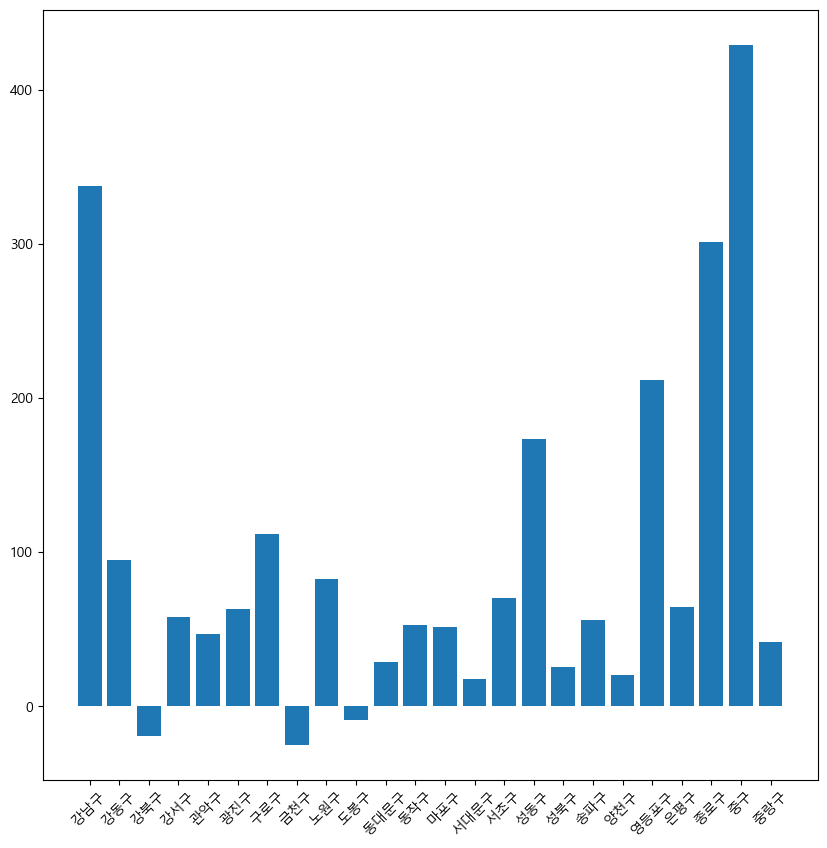

In [83]:
plt.figure(figsize=(10,10))
plt.bar(df_result["gu"], df_result["oil_gap"])
plt.xticks(rotation=45)
plt.show()

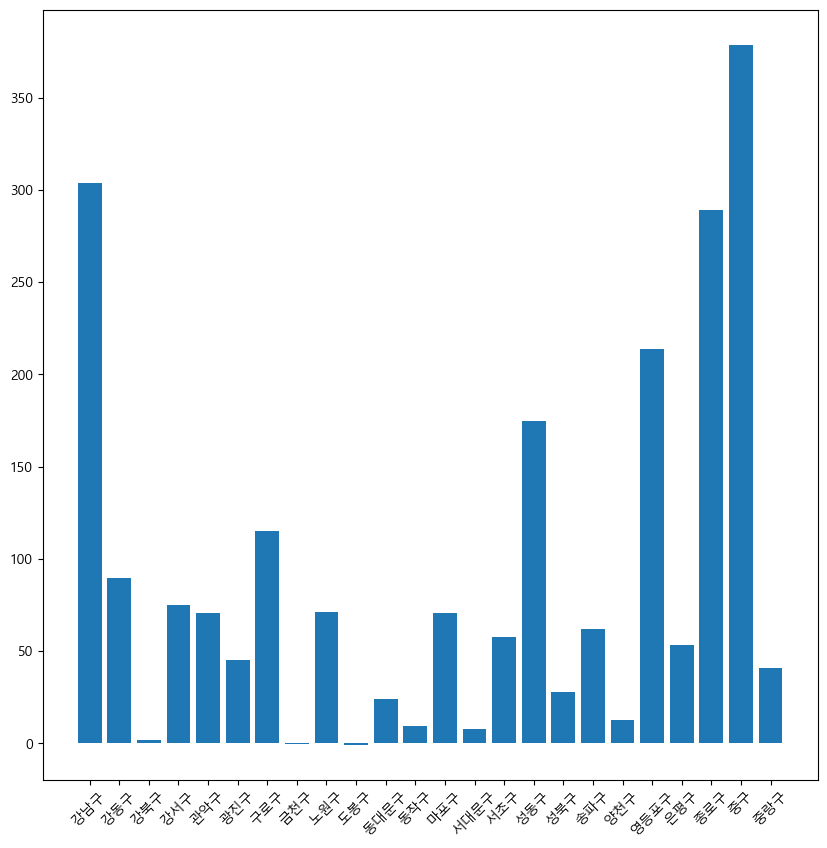

In [84]:
plt.figure(figsize=(10,10))
plt.bar(df_result["gu"], df_result["fuel_gap"])
plt.xticks(rotation=45)
plt.show()

## 3. bar그래프
- 일반주유소와 셀프주유소의 휘발유, 경유 가격 차이에 있어서 경유의 가격이 셀프주유소에 더 저렴함
- 개인적인 의견으로 휘발유의 단가가 비싸기 때문에 인력비용을 줄여도 큰 가격차이가 없는 게 아닐까 생각함.